# NetworkX

[NetworkX](https://networkx.github.io/) is an open source Python library for working with graphs and digraphs.  It can solve many of the kinds of computational problems on graphs which you will learn algorithms for in the second part of this course.


## Creating graphs

Graphs correspond to `Graph` objects.  They can be easily built up by adding nodes and edges one at a time:

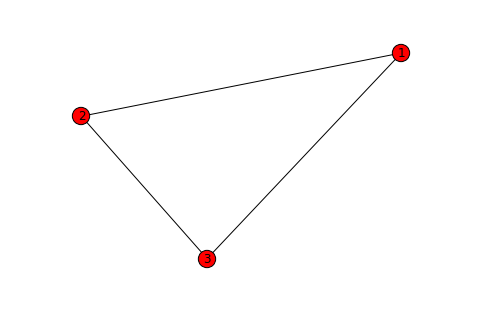

In [4]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

G=nx.Graph()
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,1)

nx.draw(G)